In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Concatenate, Lambda
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers, activations
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import cv2
import numpy as np
from numpy import std, mean, sqrt, max, min, exp
import os
import sklearn
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
print("Done Importing")


Done Importing


Using TensorFlow backend.


In [2]:
#load the saved model
model01=keras.models.load_model("best.h5")
model12=keras.models.load_model("best12.h5")

In [3]:
import cv2
import numpy as np
from numpy import std, mean, sqrt, max, min, exp

def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
# Color Transormation
def ColorTransition(Simg, Timg):
    R, G, B=cv2.split(Simg)
    R = np.float64(R)
    G = np.float64(G)
    B = np.float64(B)
 
    R1, G1, B1=cv2.split(Timg)
    R1 = np.float64(R1)
    G1 = np.float64(G1)
    B1 = np.float64(B1)
 
    # conversion from RGB to lab color space -> Source Image
    L=0.3811*R+0.5783*G+0.0402*B;
    M=0.1967*R+0.7244*G+0.0782*B;
    S=0.0241*R+0.1288*G+0.8444*B;
    L = np.float64(L)
    M = np.float64(M)
    S = np.float64(S)
 
    # conversion from RGB to lab color space -> Target Image
    L1=0.3811*R1+0.5783*G1+0.0402*B1;
    M1=0.1967*R1+0.7244*G1+0.0782*B1;
    S1=0.0241*R1+0.1288*G1+0.8444*B1;
    L1 = np.float64(L1)
    M1 = np.float64(M1)
    S1 = np.float64(S1)
 
    I2 = cv2.merge((L,M,S))
    A2 = cv2.merge((L1,M1,S1))
    
    l=0.5774*L+0.5774*M+0.5774*S;
    a=0.4082*L+0.4082*M-0.8165*S;
    b=0.7071*L-0.7071*M;
    l = np.float64(l)
    a = np.float64(a)
    b = np.float64(b)
 
    l1=0.5774*L1+0.5774*M1+0.5774*S1;
    a1=0.4082*L1+0.4082*M1-0.8165*S1;
    b1=0.7071*L1-0.7071*M1;
    l1 = np.float64(l1)
    a1 = np.float64(a1)
    b1 = np.float64(b1)
 
    I3 = cv2.merge((l,a,b))
    A3 = cv2.merge((l1,a1,b1))
 
    std1=std(l1);
    std2=std(l);
 
    std3=std(a1);
    std4=std(a);
    
    std5=std(b1);
    std6=std(b);
 
    p=(sqrt(mean(l1))-(sqrt(mean(l))))/(sqrt(mean(l1))+(sqrt(mean(l))));   
    s=0
    if p>0:    
        s=0.9-(0.9 - 0.15)/(1+exp((p-0.45)/(0.05)));
    else:
        s=0.15;
 
    l2=mean(mean(l1))+(l-mean(mean(l)))*(1+s);
    a2=mean(mean(a1))+(a-mean(mean(a)));
    b2=mean(mean(b1))+(b-mean(mean(b)));
    l2 = np.float64(l2)
    a2 = np.float64(a2)
    b2 = np.float64(b2)
 
    l3=mean(mean(l1))+(l-mean(mean(l)))*(std1/std2);
    a3=mean(mean(a1))+(a-mean(mean(a)))*(std3/std4);
    b3=mean(mean(b1))+(b-mean(mean(b)))*(std5/std6);
    l3 = np.float64(l3)
    a3 = np.float64(a3)
    b3 = np.float64(b3)
 
    max_l=max(l2);
    min_l=min(l2);
    max_a=max(a2);
    min_a=min(a2);
    max_b=max(b2);
    min_b=min(b2);
  
    I4 = cv2.merge((l2,a2,b2))
 
    # Conversion from lab to RGB color space%
    L2=0.5774*l2+0.4082*a2+0.7071*b2;
    M2=0.5774*l2+0.4082*a2-0.7071*b2;
    S2=0.5774*l2-0.8169*a2;
    L2 = np.float64(L2)
    M2 = np.float64(M2)
    S2 = np.float64(S2)
 
    R2=4.4679*L2-3.5873*M2+0.1193*S2;
    G2=-1.2186*L2+2.3809*M2-0.1624*S2;
    B2=0.0497*L2-0.2439*M2+1.2045*S2;
 
    I5 = cv2.merge((R1, G2, B2))
    I6 = cv2.merge((l3,a3,b3))
 
    # Conversion from lab to RGB color space%
    L3=0.5774*l3+0.4082*a3+0.7071*b3;
    M3=0.5774*l3+0.4082*a3-0.7071*b3;
    S3=0.5774*l3-0.8169*a3;
    L3 = np.float64(L3)
    M3 = np.float64(M3)
    S3 = np.float64(S3)
 
    R3=4.4679*L3-3.5873*M3+0.1193*S3;
    G3=-1.2186*L3+2.3809*M3-0.1624*S3;
    B3=0.0497*L3-0.2439*M3+1.2045*S3;
    # R3 = np.float64(R3)
    # G3 = np.float64(G3)
    # B3 = np.float64(B3)
 
    I7 = cv2.merge((R3,G3,B3))
    I7 = normalize(I7)
    return I7


def preProcessing0(img):
    Target = cv2.imread('20051020_45137_0100_PP.tif')
    Target = cv2.cvtColor(Target, cv2.COLOR_BGR2RGB)
    Target = cv2.resize(Target, (400, 400))
    img = ColorTransition(img, Target)
    img = normalize(img)
    return img

In [4]:
def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
# Color Transormation
def ColorTransition(Simg, Timg):
    R, G, B=cv2.split(Simg)
    R = np.float64(R)
    G = np.float64(G)
    B = np.float64(B)
 
    R1, G1, B1=cv2.split(Timg)
    R1 = np.float64(R1)
    G1 = np.float64(G1)
    B1 = np.float64(B1)
 
    # conversion from RGB to lab color space -> Source Image
    L=0.3811*R+0.5783*G+0.0402*B;
    M=0.1967*R+0.7244*G+0.0782*B;
    S=0.0241*R+0.1288*G+0.8444*B;
    L = np.float64(L)
    M = np.float64(M)
    S = np.float64(S)
 
    # conversion from RGB to lab color space -> Target Image
    L1=0.3811*R1+0.5783*G1+0.0402*B1;
    M1=0.1967*R1+0.7244*G1+0.0782*B1;
    S1=0.0241*R1+0.1288*G1+0.8444*B1;
    L1 = np.float64(L1)
    M1 = np.float64(M1)
    S1 = np.float64(S1)
 
    I2 = cv2.merge((L,M,S))
    A2 = cv2.merge((L1,M1,S1))
    
    l=0.5774*L+0.5774*M+0.5774*S;
    a=0.4082*L+0.4082*M-0.8165*S;
    b=0.7071*L-0.7071*M;
    l = np.float64(l)
    a = np.float64(a)
    b = np.float64(b)
 
    l1=0.5774*L1+0.5774*M1+0.5774*S1;
    a1=0.4082*L1+0.4082*M1-0.8165*S1;
    b1=0.7071*L1-0.7071*M1;
    l1 = np.float64(l1)
    a1 = np.float64(a1)
    b1 = np.float64(b1)
 
    I3 = cv2.merge((l,a,b))
    A3 = cv2.merge((l1,a1,b1))
 
    std1=std(l1);
    std2=std(l);
 
    std3=std(a1);
    std4=std(a);
    
    std5=std(b1);
    std6=std(b);
 
    p=(sqrt(mean(l1))-(sqrt(mean(l))))/(sqrt(mean(l1))+(sqrt(mean(l))));   
    s=0
    if p>0:    
        s=0.9-(0.9 - 0.15)/(1+exp((p-0.45)/(0.05)));
    else:
        s=0.15;
 
    l2=mean(mean(l1))+(l-mean(mean(l)))*(1+s);
    a2=mean(mean(a1))+(a-mean(mean(a)));
    b2=mean(mean(b1))+(b-mean(mean(b)));
    l2 = np.float64(l2)
    a2 = np.float64(a2)
    b2 = np.float64(b2)
 
    l3=mean(mean(l1))+(l-mean(mean(l)))*(std1/std2);
    a3=mean(mean(a1))+(a-mean(mean(a)))*(std3/std4);
    b3=mean(mean(b1))+(b-mean(mean(b)))*(std5/std6);
    l3 = np.float64(l3)
    a3 = np.float64(a3)
    b3 = np.float64(b3)
 
    max_l=max(l2);
    min_l=min(l2);
    max_a=max(a2);
    min_a=min(a2);
    max_b=max(b2);
    min_b=min(b2);
  
    I4 = cv2.merge((l2,a2,b2))
 
    # Conversion from lab to RGB color space%
    L2=0.5774*l2+0.4082*a2+0.7071*b2;
    M2=0.5774*l2+0.4082*a2-0.7071*b2;
    S2=0.5774*l2-0.8169*a2;
    L2 = np.float64(L2)
    M2 = np.float64(M2)
    S2 = np.float64(S2)
 
    R2=4.4679*L2-3.5873*M2+0.1193*S2;
    G2=-1.2186*L2+2.3809*M2-0.1624*S2;
    B2=0.0497*L2-0.2439*M2+1.2045*S2;
 
    I5 = cv2.merge((R1, G2, B2))
    I6 = cv2.merge((l3,a3,b3))
 
    # Conversion from lab to RGB color space%
    L3=0.5774*l3+0.4082*a3+0.7071*b3;
    M3=0.5774*l3+0.4082*a3-0.7071*b3;
    S3=0.5774*l3-0.8169*a3;
    L3 = np.float64(L3)
    M3 = np.float64(M3)
    S3 = np.float64(S3)
 
    R3=4.4679*L3-3.5873*M3+0.1193*S3;
    G3=-1.2186*L3+2.3809*M3-0.1624*S3;
    B3=0.0497*L3-0.2439*M3+1.2045*S3;
    # R3 = np.float64(R3)
    # G3 = np.float64(G3)
    # B3 = np.float64(B3)
 
    I7 = cv2.merge((R3,G3,B3))
    I7 = normalize(I7)
    return I7


def preProcessing1(img):
    # Target = cv2.imread(train_path+'/0/IDRiD_061.jpg')
    Target = cv2.imread('20051020_45137_0100_PP.tif')
    Target = cv2.cvtColor(Target, cv2.COLOR_BGR2RGB)
    Target = cv2.resize(Target, (400, 400))
    img = ColorTransition(img, Target)
    img = normalize(img)
    partA = -4 * cv2.GaussianBlur(img, (25,25), 0)
    partB = 4*img + 0.5
    result = partA + partB
    result = normalize(result)
    return result       

In [5]:
dir1='Dataset01/TrainSet'
train=os.listdir(dir1)
dir2='Dataset01/TestSet'
test=os.listdir(dir2)
x_train=[]
y_train=[]
for i in train:
    a=dir1+'/'+i
    f=os.listdir(a)
    for j in f:
            if(j[0]!="."):
                x_train.append(a+"/"+j)
                y_train.append(int(i))
x_test=[]
y_test=[]
for i in test:
    if(i=='1' or i=='2' or i=='0'):
        a=dir2+'/'+i
        f=os.listdir(a)
        for j in f:
                if(j[0]!="."):
                    x_test.append(a+"/"+j)
                    y_test.append(int(i))

#predicting for all the images in the test set
y_test_pred=[]
for i in x_test:
        img = load_img(i,target_size=(400,400))
        img = img_to_array(img)
        img1=preProcessing0(img)
        img1 = np.expand_dims(img1, axis=0)
        a=np.argmax(model01.predict(img1))
        y_test_pred.append(a)


test:
[[38  7]
 [ 8 50]]
precision: 0.8549
recall:. 0.8544


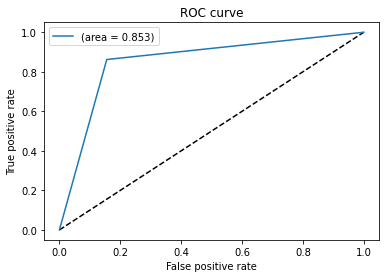

In [6]:
print("test:")
print(confusion_matrix(y_test, y_test_pred))
pr=precision_score(y_test, y_test_pred,average="weighted")
re=recall_score(y_test, y_test_pred,average="weighted")
print("precision:",f"{pr:.4f}")
print("recall:.",f"{re:.4f}")
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
auc=metrics.auc(fpr, tpr)
fig = plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='(area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()

In [7]:
dir1='Dataset12/TrainSet'
train=os.listdir(dir1)
dir2='Dataset12/TestSet'
test=os.listdir(dir2)
x_train=[]
y_train=[]
for i in train:
    a=dir1+'/'+i
    f=os.listdir(a)
    for j in f:
            if(j[0]!="."):
                x_train.append(a+"/"+j)
                y_train.append(int(i))
x_test=[]
y_test=[]
for i in test:
        a=dir2+'/'+i
        f=os.listdir(a)
        for j in f:
                if(j[0]!="."):
                    x_test.append(a+"/"+j)
                    y_test.append(int(i))

#predicting for all the images in the test set
y_test_pred=[]
for i in x_test:
        img = load_img(i,target_size=(400,400))
        img = img_to_array(img)
        img1=preProcessing1(img)
        img1 = np.expand_dims(img1, axis=0)
        a=np.argmax(model12.predict(img1))+1
        y_test_pred.append(a)

test:
[[ 7  3]
 [ 4 44]]
precision: 0.8845
recall:. 0.8793
accuracy: 0.8793
auc: 0.8083333333333332


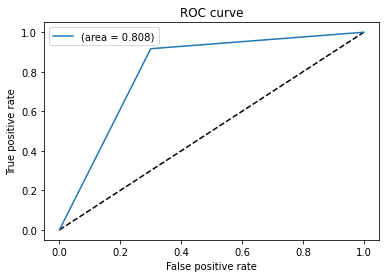

In [8]:
print("test:")
print(confusion_matrix(y_test, y_test_pred))
pr=precision_score(y_test, y_test_pred,average="weighted")
re=recall_score(y_test, y_test_pred,average="weighted")
print("precision:",f"{pr:.4f}")
print("recall:.",f"{re:.4f}")
print("accuracy:",f"{accuracy_score(y_test, y_test_pred):.4f}")
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred,pos_label=2)
auc=metrics.auc(fpr, tpr)
print("auc:",auc)
fig = plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='(area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()

In [9]:
dir1='content/Dataset/TrainSet'
train=os.listdir(dir1)
dir2='content/Dataset/TestSet'
test=os.listdir(dir2)
x_train=[]
y_train=[]
for i in train:
    a=dir1+'/'+i
    f=os.listdir(a)
    for j in f:
            if(j[0]!="."):
                x_train.append(a+"/"+j)
                y_train.append(int(i))
x_test=[]
y_test=[]
for i in test:
        a=dir2+'/'+i
        f=os.listdir(a)
        for j in f:
                if(j[0]!="."):
                    x_test.append(a+"/"+j)
                    y_test.append(int(i))

#predicting for all the images in the test set
y_test_pred=[]
for i in x_test:
        img = load_img(i,target_size=(400,400))
        img = img_to_array(img)
        img1=preProcessing1(img)
        img1 = np.expand_dims(img1, axis=0)
        a=np.argmax(model12.predict(img1))+1
        y_test_pred.append(a)
#predicting for all the images in the test set
y_test_pred=[]
for i in x_test:
        img = load_img(i,target_size=(400,400))
        img = img_to_array(img)
        img1=preProcessing0(img)
        img1 = np.expand_dims(img1, axis=0)
        a=np.argmax(model01.predict(img1))
        if(a==0):
            y_test_pred.append(a)
        else:
            img2=preProcessing1(img)
            img2 = np.expand_dims(img2, axis=0)
            b=np.argmax(model12.predict(img2))+1
            y_test_pred.append(b)        
print("done")

done


In [10]:
print("test:")
print(confusion_matrix(y_test, y_test_pred))
pr=precision_score(y_test, y_test_pred,average="weighted")
re=recall_score(y_test, y_test_pred,average="weighted")
print("precision:",f"{pr:.4f}")
print("recall:.",f"{re:.4f}")
print("accuracy:",f"{accuracy_score(y_test, y_test_pred):.4f}")

test:
[[38  5  2]
 [ 3  4  3]
 [ 5  1 42]]
precision: 0.8162
recall:. 0.8155
accuracy: 0.8155
